In [3]:
import pandas as pd

recipe_mpr = pd.read_json('https://raw.githubusercontent.com/D3Mlab/Recipe-MPR/main/data/500QA.json', orient = 'records')

recipe_mpr_clean = (
    recipe_mpr
    .assign(
        query_aspects = lambda d: d.correctness_explanation.apply(lambda x: list(x.keys())),
        num_aspects = lambda d: d.query_aspects.apply(len),
        option_id = lambda d: d.options.apply(lambda x: list(x.keys())),
        option_text = lambda d: d.options.apply(lambda x: list(x.values()))
    )
    .query("num_aspects > 1")
)

recipe_mpr_clean

,query,query_type,options,answer,correctness_explanation,query_aspects,num_aspects,option_id,option_text
0,I want to make a warm dish containing oysters,"{'Specific': 0, 'Commonsense': 1, 'Negated': 0...","{'08cb462fdf': 'Simple creamy oyster soup', '5...",08cb462fdf,"{'warm dish': 'soup', 'oysters': 'oyster'}","[warm dish, oysters]",2,"[08cb462fdf, 5b9441298f, 00310c3462, 8635ea3d3...","[Simple creamy oyster soup, Seasoned salted cr..."
1,Can I have a recipe for fish that's roasted?,"{'Specific': 0, 'Commonsense': 0, 'Negated': 0...","{'069aa1f8af': 'Salmon roasted with olive oil,...",069aa1f8af,"{'fish': 'Salmon', 'roasted': 'roasted'}","[fish, roasted]",2,"[069aa1f8af, 0540d7ae34, 046ab31795, 608f09d6f...","[Salmon roasted with olive oil, chives, and ta..."
2,"What are recipes for fish, but not baked in th...","{'Specific': 0, 'Commonsense': 1, 'Negated': 1...",{'3536b10328': 'Salmon fillets grilled in a pa...,3536b10328,"{'fish': 'Salmon', 'not baked in the oven': 'g...","[fish, not baked in the oven]",2,"[3536b10328, 6adb5c39a1, 0921b8c26f, 29b171ab3...",[Salmon fillets grilled in a pan with herbs an...
3,I would like a shrimp recipe and I'm trying t...,"{'Specific': 0, 'Commonsense': 1, 'Negated': 0...",{'00a39a8659': 'Shrimp roasted with vegetables...,00a39a8659,"{'shrimp': 'shrimp', 'balanced diet': 'with ve...","[shrimp, balanced diet]",2,"[00a39a8659, 4dafcc5cf8, 18846ac2fa, a3fd84d74...",[Shrimp roasted with vegetables in a zesty Ita...
4,Can I have a shrimp pasta recipe for someone w...,"{'Specific': 1, 'Commonsense': 1, 'Negated': 0...",{'3c9d5c4033': 'Shrimp and vegetables with spa...,3c9d5c4033,"{'shrimp': 'Shrimp', 'pasta': 'spaghetti', 'lo...","[shrimp, pasta, low spice tolerance]",3,"[3c9d5c4033, 7ef0e55927, 9a47c3c5fa, 8395b8532...","[Shrimp and vegetables with spaghetti noodles,..."
...,...,...,...,...,...,...,...,...,...
495,"I have to use some eggs before they get bad, w...","{'Specific': 0, 'Commonsense': 1, 'Negated': 0...",{'14cf9f5a09': 'Creamy base with dill flavorin...,14cf9f5a09,"{'eggs': 'eggs', 'noodle dish': 'noodles'}","[eggs, noodle dish]",2,"[14cf9f5a09, 5fb69567c6, 981c1107e0, a2bbc573a...","[Creamy base with dill flavoring, eggs, and no..."
496,What is a side dish recipe that will set my mo...,"{'Specific': 0, 'Commonsense': 1, 'Negated': 0...",{'1158f0fbd4': 'Assorted vegetables with cayen...,1158f0fbd4,"{'side dish': 'assorted vegetables', 'set my m...","[side dish, set my mouth on fire]",2,"[1158f0fbd4, f89e466120, 171fcb3767, 0138cdb83...","[Assorted vegetables with cayenne pepper, Dipp..."
497,What's a spicy dish for someone who has lower ...,"{'Specific': 0, 'Commonsense': 1, 'Negated': 0...","{'bb089cf062': 'Mildly spicy chili recipe', '2...",bb089cf062,"{'spicy': ['spicy', 'chili'], 'lower spice tol...","[spicy, lower spice tolerance, dish]",3,"[bb089cf062, 2d3d0a5e17, 450940e6f6, a0751f8e5...","[Mildly spicy chili recipe, Jalapeno peppers t..."
498,Whats a marinade I could make to make my ribey...,"{'Specific': 0, 'Commonsense': 0, 'Negated': 0...","{'298b55bc10': 'Ribeye steak marinade', '1bb23...",298b55bc10,"{'ribeye': 'ribeye', 'marinade': 'marinade', '...","[ribeye, marinade, like a keg entree]",3,"[298b55bc10, 1bb23df7c8, 56c0c5427a, a518da64b...","[Ribeye steak marinade, Catfish marinade, Mari..."


In [9]:
recipe_mpr_clean['num_aspects'].value_counts()

num_aspects
2    375
3    110
4     15
Name: count, dtype: int64

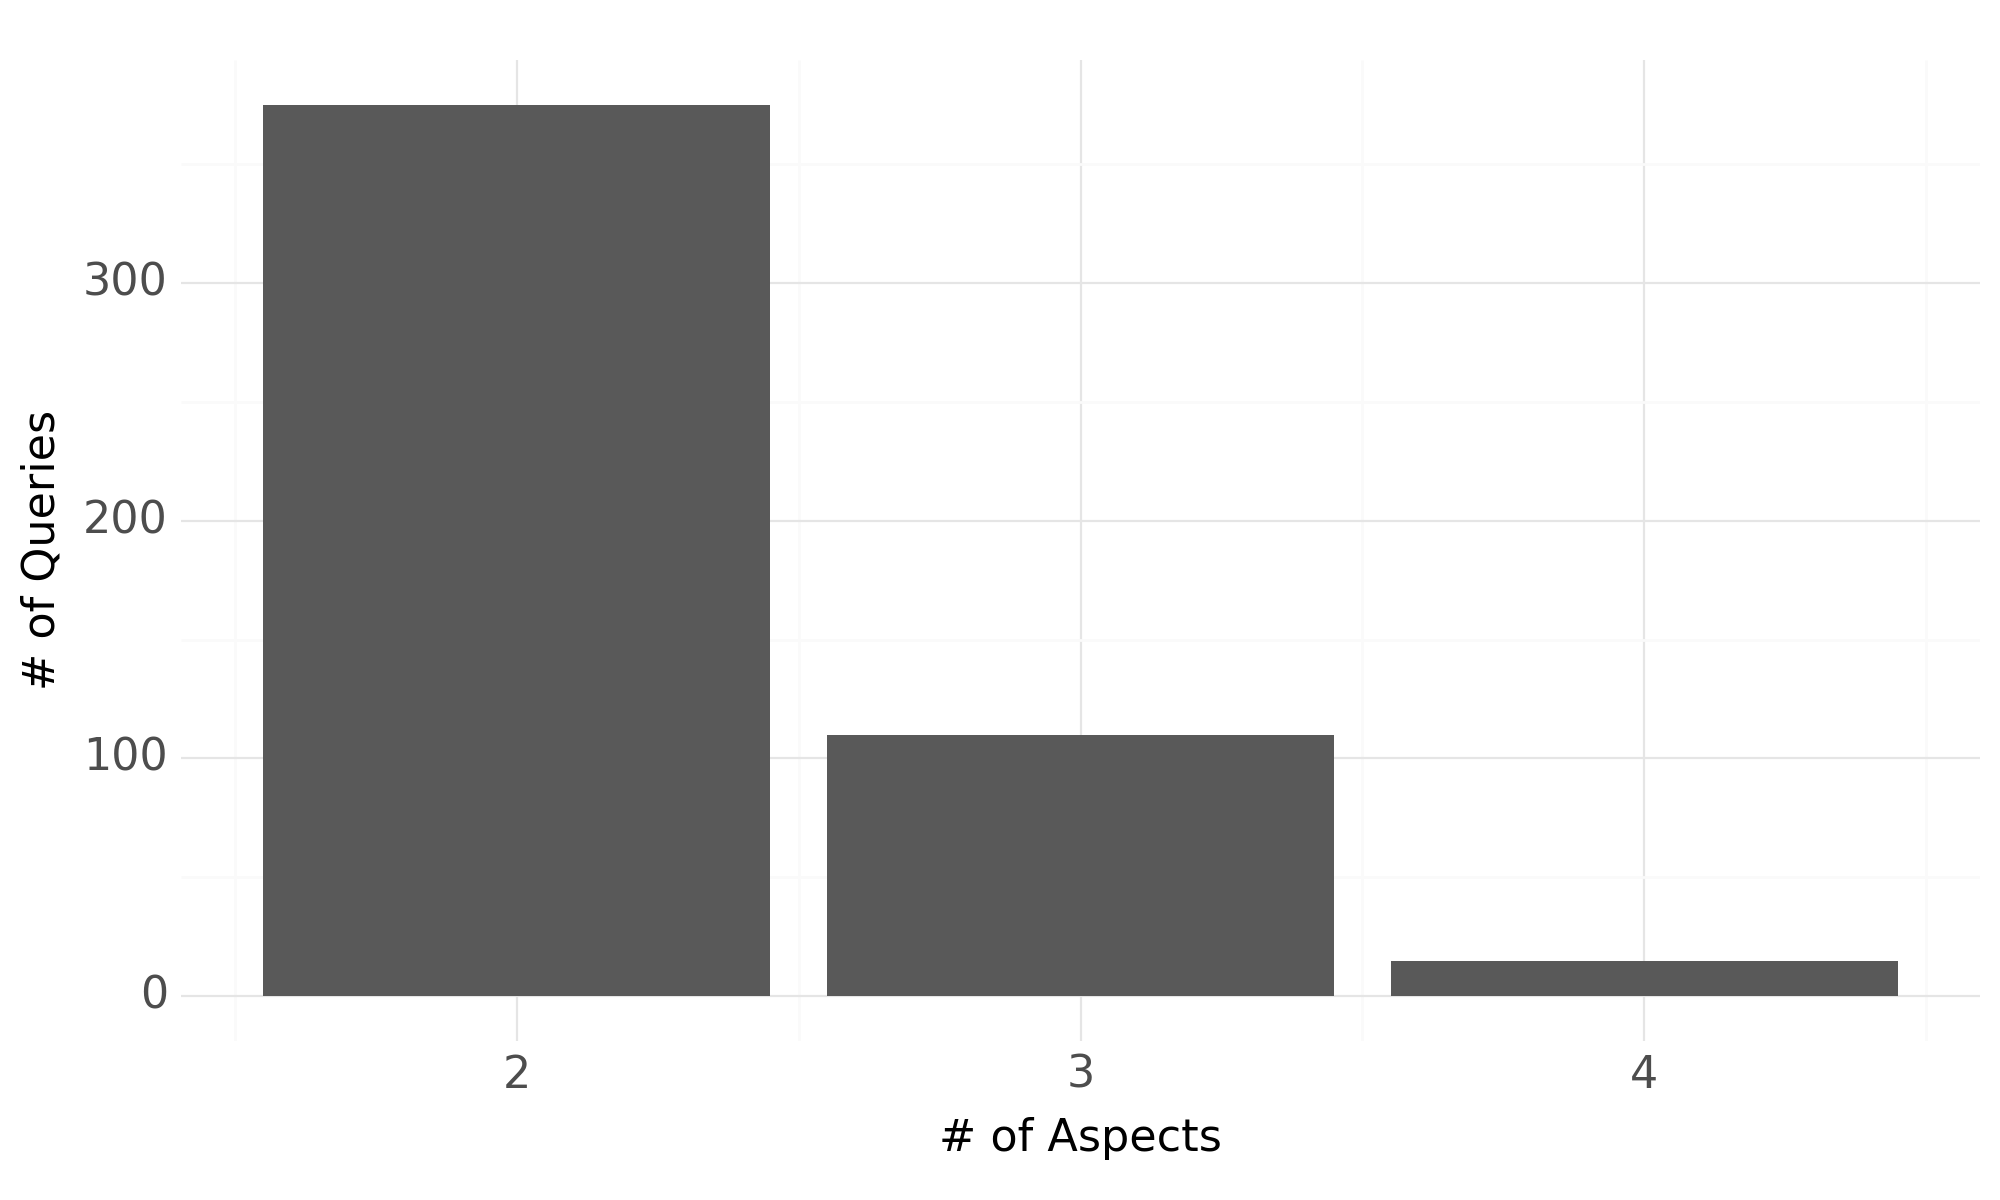

<Figure Size: (1000 x 600)>

In [8]:
from plotnine import *

(
    ggplot(
        recipe_mpr_clean,
        aes(x = 'num_aspects')
    ) +
    geom_bar() +
    labs(y = "# of Queries", x = "# of Aspects", color = "", linetype="") +
    theme_minimal() +
    theme(figure_size=(10, 6), text=element_text(size=16))
)
